# Overview

Mechanical systems are often fitted with a slew of sensors to monitor real time performance and equipment health. This data is extremely valuable in identifying issues based on a set of rules and diangosing failures. Depending on the system, data can be collected in intervals of milliseconds to hours. Regardless, this information is extremely valuable and is primed for machine learning. 

This application of machine learning can be used to identify very complex systems based on a high order of inputs, predict future states of equipment all of which can prevent unplanned shutdowns or help schedule system maintenace. All of which can optimize company resources resulting in cost savings.

This example highlights a bladder accumulator system which is often vital to rotating equipment and lubrication systems. A bladder, or ballon, is often filled with nitrogen and applies a pressure to a synthetic lubricant which overtime can aid in operation of bearings, mechanical seals, etc. Most often the pressure is monitored and a set of predefined rules are used to set alarms indicating the systems needs attention. This design methodology may not account for all the variables that impacting the performance of system once installed on a piece of equipment and may not represent well that actual application. This system is initial filled by an operator, the system pressure is monitored and once it reaches towards the bottom, it must be refilled again.

![Bladder Accumulator](../figs/BladderAccumulator.png)

What if we could use machine learning to predit future performance or a future state based on a significantly more complex model?

## The Problem

Lack of planning or insight on equipment health and performance oftens ends in abrupt failure and equipment downtime. This accrues excessive costs and can strain manpower and equipment inorder to become operable again. Logistics of managing a high volume of equpipment can become extremely challenging and less than optimal.

There is often no model that evalutes external paramters such as ambient conditions equipment performance. 

## The Solution

By implementing machine learning in these systems, we can create complex models that are specific to the system. These models can provide future predictions on performance that can be used for proactive system maintence and resource optimization. 

# Project Setup

In this application, the bladder accumulator is installed in the desert at a solar power plant (this is a very real situation). The accumulator is charged to a set pressure and the equipment operates for two years. Measurements are taken every 2 hours recording:

1. Bladder Pressure
2. Equipment Flow Rate
3. Ambient Temperature

The consumption of the synthetic lubricant is often dependent on the equipment operating variable. Rotations per minute (RPM) could also be used but we know that flow rate for a pump is dependent on the rotational speed. Generally a higher speed (or flow), results in higher consumption of the synthetic fluid. In addition, the ambient temperature in the high desert of Souther California can be extreme. The bladder accumulator is essentially a ballon. Ever wake up on a cold morning and the tire pressure sensor came on in your car? The ideal gas law says the same will happen to the bladder accumulator! These temperature extremes will create daily fluctuations in the bladder pressure which may or may not trigger an alarm. 

We can build a specific machine model that will account for all these factors in predicting future stats of the equipment.

# Import Time Series Data

The data was synthetically generated based on the yearly avg temperatures in the CA desert. General pressure drop rates were determined based on a randomized flow rate. The equipment could operate at 0,5000, or 8000 GPM. The pressure decay rate increased as a function of flow. We'll imagine the system was primed to 60 PSI and required refill at 35 PSI. This data was generated in the first notebook and exported to a csv. This remainder of the notebook will follow the *main.py* file.

In [10]:
import pandas as pd
csv_path = "../data/sys_data.csv"
df = pd.read_csv(csv_path)
df.head(5)

,Temp,Flow Rate,Pressure
0,45.375343,0,60.000000
1,48.286265,0,60.344280
2,51.688183,0,60.746956
3,56.996421,0,61.376377
4,59.456158,0,61.666956


Let's plot the time series data for review.

Text(0, 0.5, 'System Pressure')

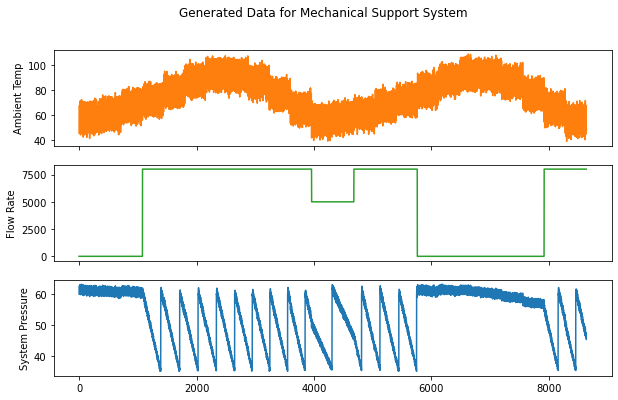

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt

time = range(len(df["Temp"]))

fig,axs = plt.subplots(3,sharex=True,figsize=(10,6))
fig.suptitle("Generated Data for Mechanical Support System")
axs[0].plot(time,df['Temp'],'tab:orange')
axs[0].set_ylabel("Ambient Temp")
axs[1].plot(time,df['Flow Rate'],'tab:green')
axs[1].set_ylabel("Flow Rate")
axs[2].plot(time,df["Pressure"])
axs[2].set_ylabel("System Pressure")

This data is generated over two years. In the first plot, we see the yearly cycle of temperature variation along with the daily. The second plot illustrates the flow rate which may depend on the plant demand. We'll see a clear correlation to to lower pressure drop in the system when the pump is in 'standby' (i.e. zero flow). There is limited consumption of the fluid through this period. We can also see when the equpment operates at 5000 GPM, the period of performance is at a longer cycle than when operating at 8000 GPM. 

Let's look at the pressure of a course of 5 days. We see temperatures swing throughout the 5 days between 45-70 F which is typical for January. The equipment is initially in standby so we have very little pressure decay due to operation. We can see however how the system pressure is in phase with the ambient temperature. This could be detrimental to the system or trigger false alarms.

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(time[:60],df['Temp'][:60],'tab:orange')
plt.plot(time[:60],df['Pressure'][:60])
plt.ylabel("System Pressure [psi]")
plt.xlabel("Time")
plt.legend=(['Temp','Pressure'])
plt.title("System Pressure Over First 5 Days")